In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
import networkx as nx

In [2]:
df_train = pd.read_csv('/content/train.csv')
df_train

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df_train.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df_train.drop(['PassengerId','Ticket', 'Cabin', 'Name'], axis=1, inplace=True)
df_train

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [5]:
mean_age = df_train['Age'].mean()
df_train['Age'].fillna(mean_age, inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
most_frequent_embarked = df_train['Embarked'].mode()[0]
df_train['Embarked'].fillna(most_frequent_embarked, inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
age_bins = [0, 18, 35, 50, float('inf')]
age_labels = ['Child', 'Young', 'Middle-aged', 'Adult']

df_train['AgeCategory'] = pd.cut(df_train['Age'], bins=age_bins, labels=age_labels, right=False)
AgeCategory_counts = df_train['AgeCategory'].value_counts()
AgeCategory_counts

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Young          543
Middle-aged    161
Child          113
Adult           74
Name: AgeCategory, dtype: int64

In [8]:
df_train = pd.get_dummies(df_train, columns=['Sex', 'Embarked','AgeCategory','Pclass'], drop_first=False)
df_train

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,AgeCategory_Child,AgeCategory_Young,AgeCategory_Middle-aged,AgeCategory_Adult,Pclass_1,Pclass_2,Pclass_3
0,0,22.000000,1,0,7.2500,0,1,0,0,1,0,1,0,0,0,0,1
1,1,38.000000,1,0,71.2833,1,0,1,0,0,0,0,1,0,1,0,0
2,1,26.000000,0,0,7.9250,1,0,0,0,1,0,1,0,0,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,0,1,0,0,1,0,1,0,0
4,0,35.000000,0,0,8.0500,0,1,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,0,1,0,0,1,0,1,0,0,0,1,0
887,1,19.000000,0,0,30.0000,1,0,0,0,1,0,1,0,0,1,0,0
888,0,29.699118,1,2,23.4500,1,0,0,0,1,0,1,0,0,0,0,1
889,1,26.000000,0,0,30.0000,0,1,1,0,0,0,1,0,0,1,0,0


In [9]:
df_train['Parch'] = df_train['Parch'].apply(lambda x: 0 if x == 0 else 1)

df_train['SibSp'] = df_train['SibSp'].apply(lambda x: 0 if x == 0 else 1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
df_train.drop(['Age','Fare'], axis=1, inplace=True)
df_train

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Survived,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,AgeCategory_Child,AgeCategory_Young,AgeCategory_Middle-aged,AgeCategory_Adult,Pclass_1,Pclass_2,Pclass_3
0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
1,1,1,0,1,0,1,0,0,0,0,1,0,1,0,0
2,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
3,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0
4,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0
887,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0
888,0,1,1,1,0,0,0,1,0,1,0,0,0,0,1
889,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0


In [11]:
df_train.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Survived', 'SibSp', 'Parch', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'AgeCategory_Child', 'AgeCategory_Young',
       'AgeCategory_Middle-aged', 'AgeCategory_Adult', 'Pclass_1', 'Pclass_2',
       'Pclass_3'],
      dtype='object')

In [12]:
new_column_names = {
    'Sex_female': 'Female',
    'Sex_male': 'Male',
    'Embarked_C': 'C',
    'Embarked_Q': 'Q',
    'Embarked_S': 'S',
    'AgeCategory_Child': 'Child',
    'AgeCategory_Young': 'Young',
    'AgeCategory_Middle-aged': 'Middle-aged',
    'AgeCategory_Adult': 'Adult',
    'Pclass_1': 'Pclass_1',
    'Pclass_2': 'Pclass_2',
    'Pclass_3': 'Pclass_3'
}

df_train.rename(columns=new_column_names, inplace=True)
df_train

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Survived,SibSp,Parch,Female,Male,C,Q,S,Child,Young,Middle-aged,Adult,Pclass_1,Pclass_2,Pclass_3
0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
1,1,1,0,1,0,1,0,0,0,0,1,0,1,0,0
2,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
3,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0
4,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0
887,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0
888,0,1,1,1,0,0,0,1,0,1,0,0,0,0,1
889,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0


In [13]:
#df_train.to_csv('processed_titanic_data.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
min_support = 0.1

frequent_itemsets = apriori(df_train, min_support=min_support, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [15]:
min_confidence = 0.7

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)
#print(rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Female),(Survived),0.352413,0.383838,0.261504,0.742038,1.933205,0.126234,2.388577,0.745420
1,(SibSp),(S),0.317621,0.725028,0.231201,0.727915,1.003982,0.000917,1.010611,0.005812
2,(Parch),(S),0.239057,0.725028,0.179574,0.751174,1.036062,0.006250,1.105076,0.045741
3,(Male),(S),0.647587,0.725028,0.494949,0.764298,1.054163,0.025431,1.166609,0.145796
4,(Pclass_3),(Male),0.551066,0.647587,0.389450,0.706721,1.091314,0.032587,1.201631,0.186383
5,(Young),(S),0.609428,0.725028,0.430976,0.707182,0.975386,-0.010876,0.939055,-0.060689
6,(Middle-aged),(S),0.180696,0.725028,0.142536,0.788820,1.087985,0.011527,1.302073,0.098706
7,(Pclass_2),(S),0.206510,0.725028,0.184063,0.891304,1.229338,0.034338,2.529742,0.235105
8,(Pclass_3),(S),0.551066,0.725028,0.396184,0.718941,0.991604,-0.003354,0.978342,-0.018511
9,(Pclass_3),(Young),0.551066,0.609428,0.386083,0.700611,1.149621,0.050248,1.304565,0.289906


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable h

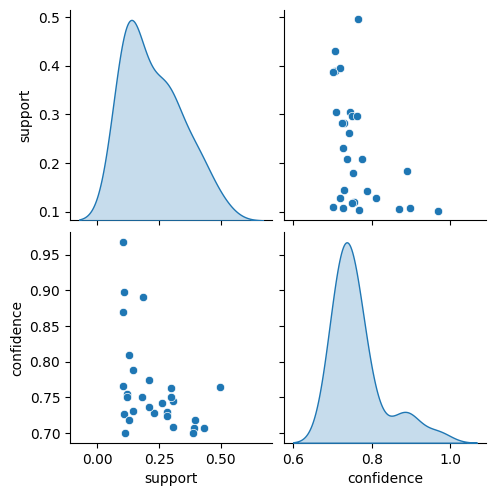

In [17]:
sns.pairplot(rules, vars=["support", "confidence"], diag_kind="kde", markers="o", palette="husl")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


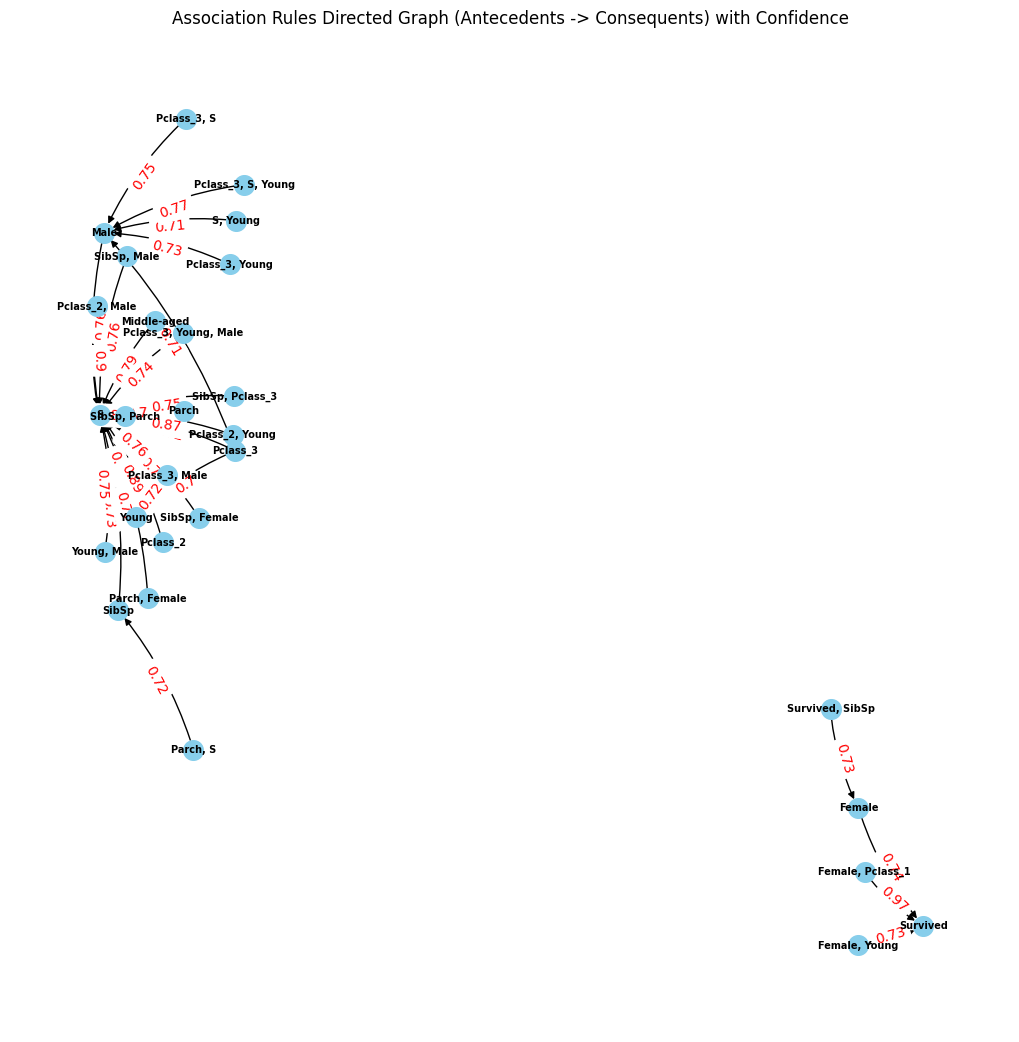

In [18]:
G = nx.DiGraph()

for _, row in rules.iterrows():
    antecedent = ', '.join(list(row['antecedents']))
    consequent = ', '.join(list(row['consequents']))
    confidence = round(row['confidence'], 2)
    G.add_edge(antecedent, consequent, label=confidence)

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=200, node_color="skyblue", font_size=7, font_weight="bold", arrows=True, connectionstyle="arc3,rad=0.1")
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color='red')
plt.title("Association Rules Directed Graph (Antecedents -> Consequents) with Confidence")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


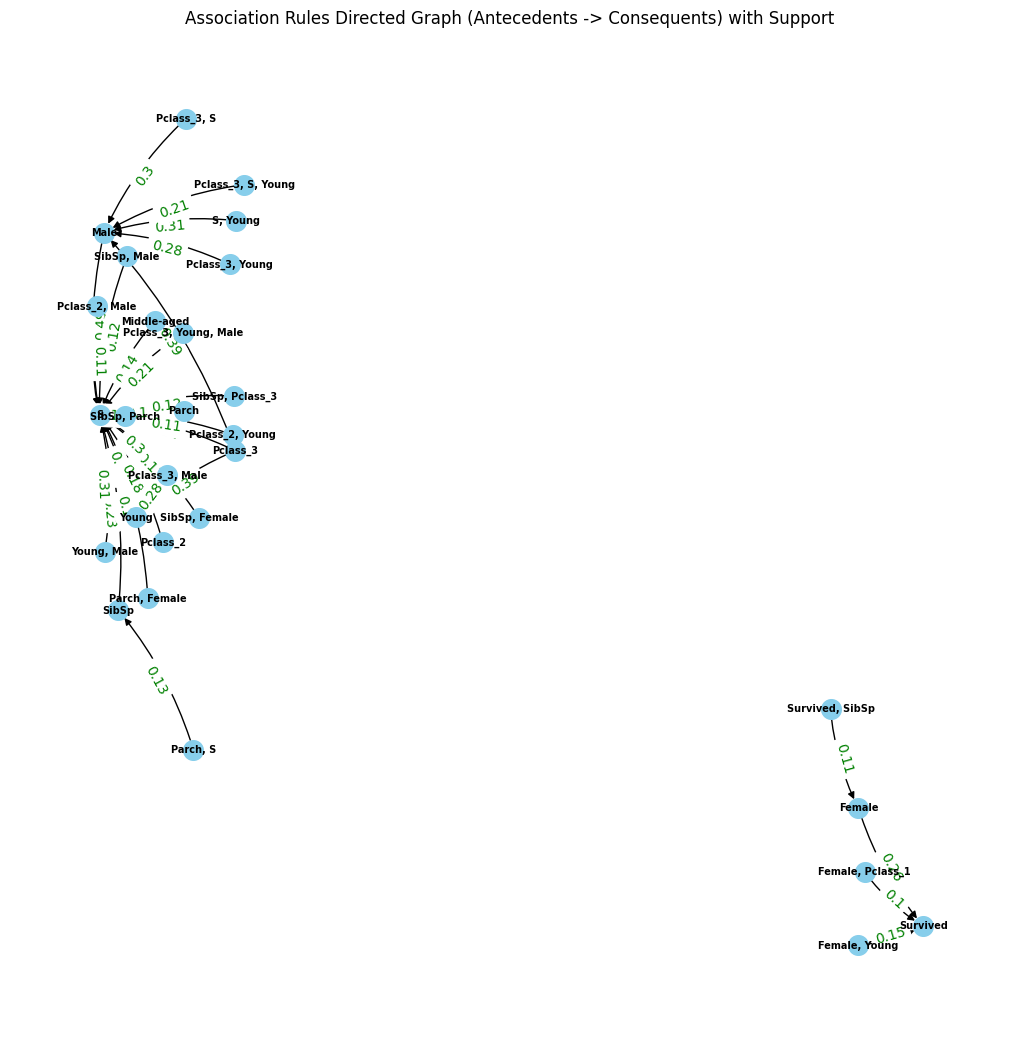

In [19]:
G = nx.DiGraph()

for _, row in rules.iterrows():
    antecedent = ', '.join(list(row['antecedents']))
    consequent = ', '.join(list(row['consequents']))
    support = round(row['support'], 2)
    G.add_edge(antecedent, consequent, label=support)

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=200, node_color="skyblue", font_size=7, font_weight="bold", arrows=True, connectionstyle="arc3,rad=0.1")
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color='green')
plt.title("Association Rules Directed Graph (Antecedents -> Consequents) with Support")
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
